<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo2_Fundamentos_AI/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
 <img src="https://github.com/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo2_Fundamentos_AI/Imagenes/AI.jpg?raw=true" alt="descriptiva" width="50%" height="50%">  
</center>


In [1]:
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython.git

Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 776, done.
remote: Counting objects: 100% (321/321), done.
remote: Compressing objects: 100% (220/220), done.
remote: Total 776 (delta 235), reused 141 (delta 101), pack-reused 455 (from 1)
Receiving objects: 100% (776/776), 43.70 MiB | 10.16 MiB/s, done.
Resolving deltas: 100% (355/355), done.
Updating files: 100% (141/141), done.


In [2]:
import os
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")

# Regresión lineal
$$
y = \underbrace{\beta_0}_\text{Intercepto} + \underbrace{\beta_1}_\text{Coeficiente 1} x_1 + \underbrace{\beta_2}_\text{Coeficiente 2}  x_2 + \underbrace{\beta_3}_\text{Coeficiente 3}  x_3 + \underbrace{\beta_4}_\text{Coeficiente 4}  x_4
$$


### Conceptos.

1. El término *regresión lineal* se refiere a que el modelo es lineal en sus parámetros:
$$
\beta_1,\beta_2,\beta_3....\beta_i
$$

2. Las variables:
$$
x_1,x_2,x_3...x_i
$$
reciben el nombre de variables independientes o explicativas.

3. La variable:  **y**  recibe el nombre de variable dependiente o explicada.


### Supuestos

1. **Independencia de los errores:** los errores son independientes entre sí. No deben estar correlacionados.
2. **Homoscedasticidad** (varianza constante del error): La varianza de los errores es constante para todos los valores de X.
3. **Normalidad de los errores:** Los errores siguen una distribución normal(esto es importante para hacer inferencia, no tanto para estimar β).
5. **No multicolinealidad** (en regresión múltiple): Las variables independientes no deben estar fuertemente correlacionadas entre sí.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
print("--"*65)

----------------------------------------------------------------------------------------------------------------------------------


# Ejemplo introductorio

In [7]:
# Definir los valores posibles y sus probabilidades

# 1. Generar datos correctamente
np.random.seed(42)
s = 1000

df = pd.DataFrame({
    'MetrosCuadrados': np.random.randint(30, 110, s),
    'Planta': np.random.randint(1, 11, s),
    'DistanciaPlaya_km': np.random.randint(1, 11, s)
})

# Coeficientes balanceados
df['Precio'] = (
    2000 +
    3500 * df['MetrosCuadrados'] +
    2500 * df['Planta'] -
    500  * df['DistanciaPlaya_km'] +
    np.random.normal(0, 1000, s)*20  # Ruido SD=1000
)

# 2. Guardar sin índice (esto es crucial)
df.to_csv("data/PrecioVivienda.csv", index=False)

In [8]:
# Leer los datos
data = pd.read_csv("data/PrecioVivienda.csv")
data

,MetrosCuadrados,Planta,DistanciaPlaya_km,Precio
0,81,5,9,288051.445975
1,44,5,8,163001.783107
2,101,10,1,391536.763357
3,90,4,6,276165.566846
4,50,6,9,162162.110570
...,...,...,...,...
995,69,8,3,289302.975238
996,70,5,3,275290.598171
997,40,1,9,170377.731629
998,52,4,7,192099.529896


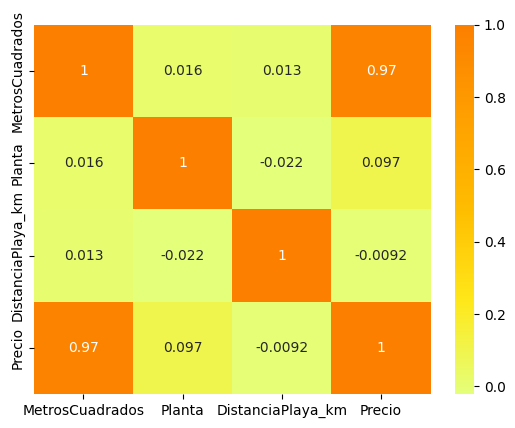

In [9]:
# Generar un diagrama de calor para observar la correlación entre variables
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [10]:
# Separar las variables explicativas y la objetivo
X = data.drop('Precio', axis=1)
y = data['Precio']

## Escalado (Standardization)
$$ z = \frac{x - \mu}{\sigma} $$

In [11]:
# Escalar características (opcional pero recomendado)
# Manualmente (ejemplo)
#X_train_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
#X_train_sm = sm.add_constant(X_train_scaled)                   # Añadir intercepto

# Usando sklearn

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [15]:
# 7. Dividir datos (usando datos escalados)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  # Usar datos escalados
                                                           y,
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
# 8. Añadir constante para statsmodels
X_train_sm = sm.add_constant(X_train)

In [17]:
# 9. Entrenar modelo
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     4173.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):               0.00
Time:                        07:35:10   Log-Likelihood:                -9072.0
No. Observations:                 800   AIC:                         1.815e+04
Df Residuals:                     796   BIC:                         1.817e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.523e+05    721.84

## Diagnostico
0. **Linealidad**: Gráfico de residuos vs predichos → no debe haber forma curva.
1. **Independencia de los errores:** Test de Durbin-Watson (valor cercano a 2 indica independencia).
2. **Homoscedasticidad** Test de Breusch-Pagan o White.
3. **Normalidad de los errores:** Test de normalidad: Shapiro-Wilk, Jarque-Bera.
5. **No multicolinealidad** Matriz de correlación. VIF (Variance Inflation Factor): valores > 10 indican alta colinealidad.

### Información general del modelo


| Elemento                          | Valor                        | Interpretación                                                          |
| --------------------------------- | ---------------------------- | ----------------------------------------------------------------------- |
| **Modelo**                        | OLS (Ordinary Least Squares) | Regresión lineal clásica, minimiza la suma de cuadrados de los errores. |
| **Dependiente**                   | `Precio`                     | Estamos modelando el precio de la vivienda.              |
| **N. observaciones**              | 800                          | Tamaño de la Muestra.                                                 |
| **Grados de libertad (modelo)**   | 3                            | Tres variables independientes.                                          |
| **Grados de libertad (residuos)** | 796                          | 800 - 3 - 1 (constante)                                                 |


### Calidad del modelo

| Métrica                | Valor  | Interpretación                                                            |
| ---------------------- | ------ | ------------------------------------------------------------------------- |
| **R-squared**          | 0.940  | El modelo explica el **99.9% de la varianza** de la variable dependiente. |
| **Adj. R-squared**     | 0.999  | También 0.999.Están las variables que son.     |
| **F-statistic**        | 415700 | Prueba global de significancia: extremadamente alto.                      |
| **Prob (F-statistic)** | 0.000  | El modelo es **estadísticamente significativo en conjunto**.              |


### Coeficientes y Significancia

| Prueba                    | Valor        | Interpretación                                                                 |
| ------------------------- | ------------ | ------------------------------------------------------------------------------ |
| **Durbin-Watson**         | 2.052        | Cerca de 2 → los errores **no están autocorrelacionados** (supuesto cumplido). |
| **Omnibus** / **JB Test** | p = 0.270    | Prueba de normalidad de residuos → p > 0.05 → **normalidad aceptada**.         |
| **Skew / Kurtosis**       | -0.140 / \~3 | Distribución de errores **simétrica y normal**.                                |
| **Cond. No. (Condición)** | 1.04         | **No hay colinealidad** severa entre variables (Esto sería excelente).         |


**Conclusiones generales:**

✅ El modelo cumple los supuestos clásicos de independencia y normalidad de errores.

✅ Los coeficientes son significativos: Todas las variables aportan valor al modelo.

✅ No hay multicolinealidad: Condición del número muy baja.

🚨 R² muy alto, hay que comprobar que no haya overfitting.

**Falta:**

🚨 Linealidad.

🚨 Homocedasticidad.

### Vamos a hacer las prediciones con el modelo

In [18]:
# Predicciones
y_train_pred_ols = ols_model.predict(X_train_sm)
X_test_sm        = sm.add_constant(X_test)
y_test_pred_ols  = ols_model.predict(X_test_sm)

## Linealidad

### Gráfico de residuos vs predichos → no debe haber forma curva.

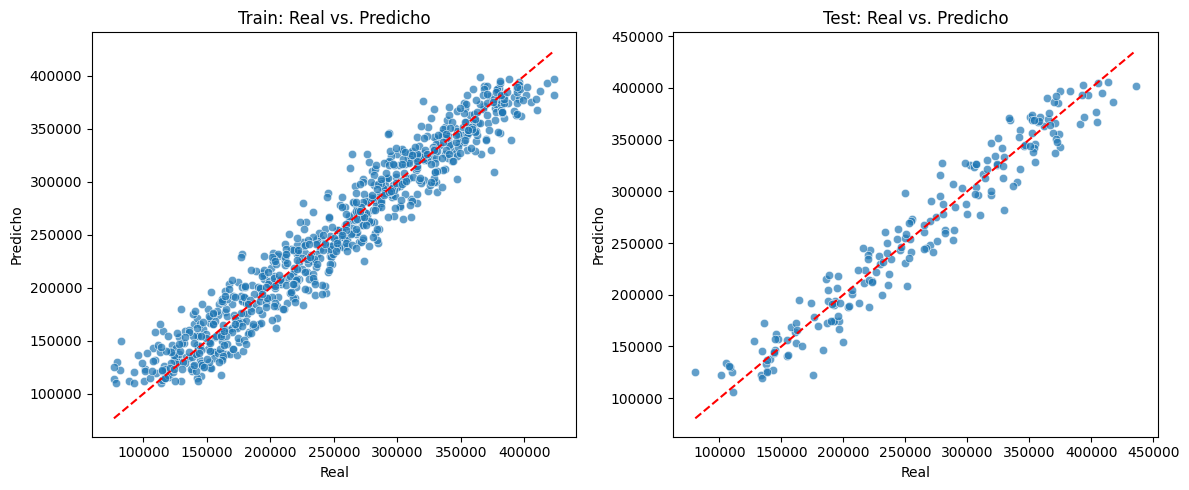

In [19]:
# ---------- Visualizaciones ---------- #
# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ols, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ols, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

### Homocedasticidad

Al Graficar los residuos (error = real − predicho) en el eje Y, contra los valores predichos en el eje X, debe mostrarse
una nube dispersa sin forma ni patrón

In [ ]:
# Residuos vs. Valores ajustados
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid

plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs. Valores Predichos")
plt.show()

In [ ]:
# 4. Q-Q PLOT ( Otra manera de verificar la normalidad de los residuos)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

## 🚨 Los Coeficientes hallados, están escalados, no son los reales de la regresión.

$$
y = \beta_0 + \beta_1 z = \beta_0 + \beta_1 \left( \frac{X - \mu}{\sigma} \right) = \underbrace{\left( \beta_0 - \frac{\beta_1 \mu}{\sigma} \right)}_{\text{Nuevo intercepto}} + \underbrace{\left( \frac{\beta_1}{\sigma} \right)}_{\text{Nueva pendiente}} X
$$

## Ajuste de coeficientes
$$ \beta_0^{\text{original}} = \beta_0^{\text{escalado}} - \sum_{i=1}^n \left( \beta_i^{\text{escalado}} \cdot \frac{\mu_i}{\sigma_i} \right) $$

$$ \beta_i^{\text{original}} = \frac{\beta_i^{\text{escalado}}}{\sigma_i} $$

In [20]:
# Obtener los coeficientes originales.
scaler_means = scaler.mean_
scaler_stds = np.sqrt(scaler.var_)

intercepto_original  = ols_model.params.iloc[0] - np.sum(ols_model.params.iloc[1:] * scaler_means / scaler_stds)
coef_metros_original = ols_model.params.iloc[1] / scaler_stds[0]
coef_planta_original = ols_model.params.iloc[2] / scaler_stds[1]
coef_dist_original   = ols_model.params.iloc[3] / scaler_stds[2]

In [21]:
print("Intercepto_original:", intercepto_original)
print("Coef_metros_original:",coef_metros_original)
print("Coef_planta_original:",coef_planta_original)
print("Coef_dist_original:  ",coef_dist_original)

Intercepto_original: 4755.945656427037
Coef_metros_original: 3512.071265292
Coef_planta_original: 2142.2238681597096
Coef_dist_original:   -615.1144658747733


# Ahora con datos reales

### Predicción de los precios del oro

In [22]:
# Leer los datos
data = pd.read_csv("data/GoldUP.csv")

In [23]:
data.head(2)

,Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,01-10-2000,4538,1455.51,8.0,46.318297,3711.02,37.23,116.65
1,01-11-2000,4483,1512.47,8.0,46.783613,3997.99,37.31,115.24


In [24]:
del data["Date"]

In [25]:
data

,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
0,4538,1455.51,8.00,46.318297,3711.02,37.23,116.65
1,4483,1512.47,8.00,46.783613,3997.99,37.31,115.24
2,4541,1178.11,8.00,46.745856,3972.12,36.98,109.56
3,4466,1208.18,8.00,46.536033,4326.72,36.90,110.52
4,4370,1267.18,7.50,46.514595,4247.04,36.73,112.01
...,...,...,...,...,...,...,...
234,45504,1603.02,4.65,76.222334,33717.62,125.85,99.57
235,46343,2298.55,4.25,75.666063,32424.10,126.24,98.34
236,47315,2987.46,4.25,75.763427,34915.80,127.00,97.39
237,49878,3156.01,4.25,74.908993,37606.89,128.53,93.35


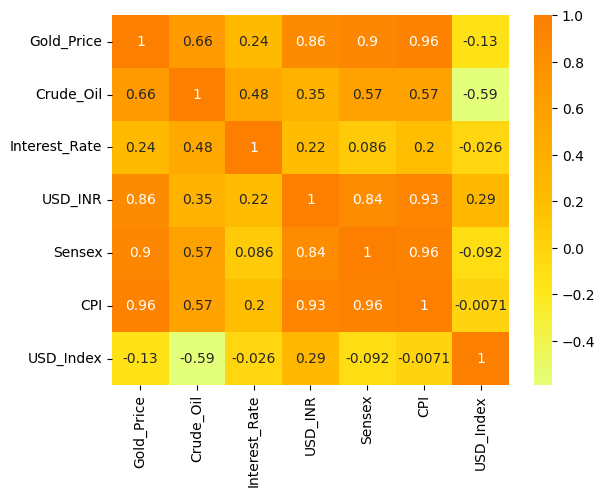

In [26]:
# correlation plot
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [27]:
data.columns

Index(['Gold_Price', 'Crude_Oil', 'Interest_Rate', 'USD_INR', 'Sensex', 'CPI',
       'USD_Index'],
      dtype='object')

In [ ]:
#0      Crude_Oil   5.210012
#1  Interest_Rate   2.144892
#2        USD_INR  26.025052
#3         Sensex  20.330916
#4            CPI  62.018251
#5      USD_Index   3.918682

In [42]:
# Dividir entre variables explicativas y variable respuesta
# 1.Manteniendo todas las variables
#X = data.drop(['Gold_Price'], axis=1)
#y = data['Gold_Price']
# 2. Eliminando variables correlacionadas
X = data[['CPI','Crude_Oil']]
y = data['Gold_Price']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- OLS Regression with statsmodels ----------- #
# Add constant (intercept) for statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

In [44]:
# Fit OLS model
ols_model = sm.OLS(y_train, X_train_sm).fit()

In [45]:
# Summary of the model
print("\nOLS Regression Summary:")
print(ols_model.summary())


OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             Gold_Price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1457.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          3.67e-115
Time:                        08:01:30   Log-Likelihood:                -1789.7
No. Observations:                 191   AIC:                             3585.
Df Residuals:                     188   BIC:                             3595.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.921e+04    20

In [46]:
# Predicciones
y_train_pred_ols = ols_model.predict(X_train_sm)
X_test_sm        = sm.add_constant(X_test_scaled)
y_test_pred_ols  = ols_model.predict(X_test_sm)

📌 **¿Qué es el VIF  (Variance Inflation Factors)?**

El VIF mide cuánto se infla la varianza de un coeficiente de regresión debido a la colinealidad con otras variables.

VIF = 1 → No hay colinealidad.

VIF entre 1 y 5 → Aceptable, baja colinealidad.

VIF entre 5 y 10 → Colinealidad moderada, cuidado.

VIF > 10 → Alta colinealidad. Problema serio.

**Se recomienda:** Si se tiene información confusa, eliminar las variables que estén fuertemente correlacionadas con otras (VIF > 10).

In [47]:
# Calcular VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
     Feature       VIF
0        CPI  1.497453
1  Crude_Oil  1.497453


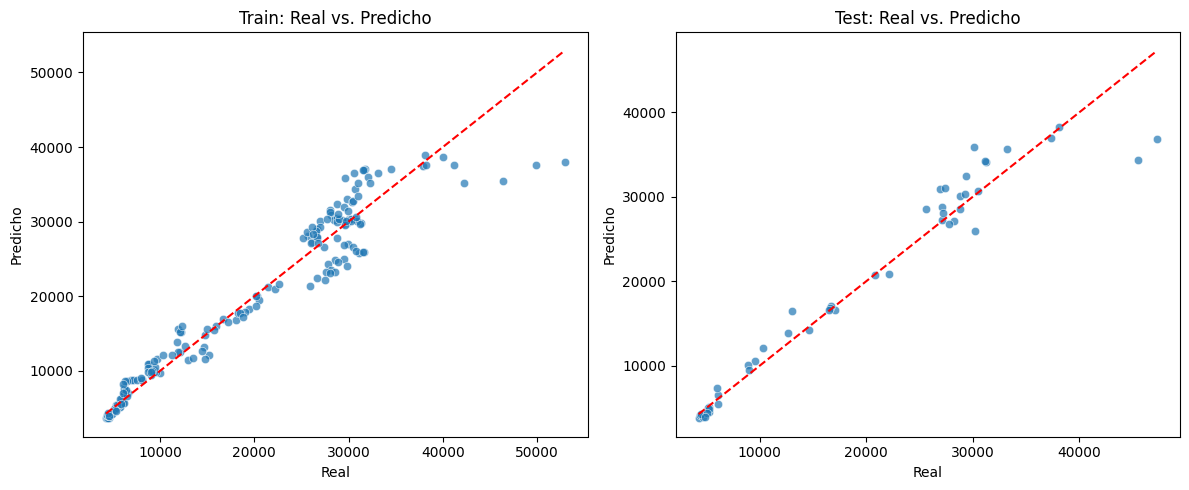

In [48]:
# ---------- Visualizaciones ---------- #

# 1. Real vs. Predicho
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred_ols, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.title("Train: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_ols, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Test: Real vs. Predicho")
plt.xlabel("Real")
plt.ylabel("Predicho")

plt.tight_layout()
plt.show()

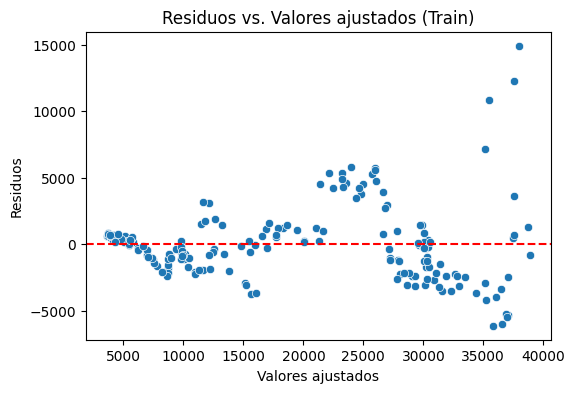

In [49]:
# Residuos vs. Valores ajustados
fitted_vals = ols_model.fittedvalues
residuals = ols_model.resid
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred_ols, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores ajustados (Train)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

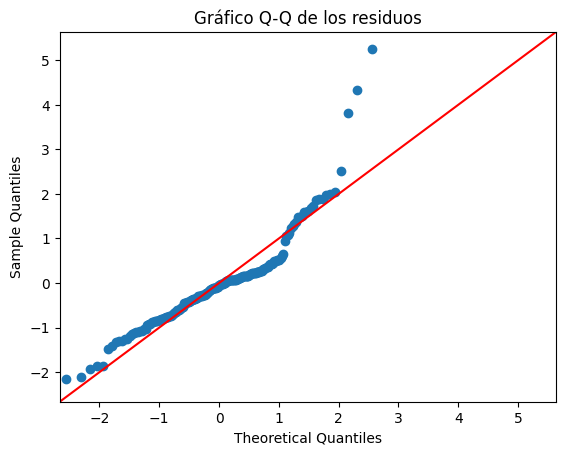

In [50]:
# 4. Q-Q PLOT (Normalidad de los residuos)
sm.qqplot(residuals, line='45', fit=True)
plt.title("Gráfico Q-Q de los residuos")
plt.show()

# Aplicando log

In [ ]:
# Leer los datos
data = pd.read_csv("data/GoldUP.csv")
del data["Date"]

In [ ]:
# 1. TRANSFORMACIÓN DE LA VARIABLE DEPENDIENTE
y = np.log(data['Gold_Price'])  # Transformación logarítmica aquí

In [ ]:
# 2. SELECCIÓN DE VARIABLES (mantenemos CPI y Crude_Oil)
X = data[['CPI', 'Crude_Oil']]  # Selección directa de features relevantes

# Train-test split (ANTES de escalar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 3. ESCALADO (solo variables independientes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 4. MODELO CON VARIABLE TRANSFORMADA
X_train_sm = sm.add_constant(X_train_scaled)
ols_model_log = sm.OLS(y_train, X_train_sm).fit()  # y_train es log(Gold_Price)

print("\nOLS Regression Summary (Log-Transformed):")
print(ols_model_log.summary())

### Análisis
Bondad de ajuste (excelente)
R² = 0.936 → El modelo explica el 93.6% de la variabilidad de log(Gold_Price).

R² ajustado = 0.935 → Prácticamente igual al R², confirma que las variables son relevantes.

F-statistic = 1378 (p-value ≈ 0) → El modelo es altamente significativo (p < 0.001).

**Clave:**

Ambos predictores son altamente significativos (p-value ≈ 0).

**CPI** domina: Su impacto es ≈ 2.1 veces mayor que Crude_Oil.

**Escala estandarizada:** Coeficientes comparables (1 SD de cambio).

### Validación de supuestos (mejoría crítica)

**a) Normalidad de residuos:**

Jarque-Bera p-value = 0.118 → No se rechaza normalidad (vs. p≈0 en modelo anterior).

Skew = 0.238 → Asimetría leve (mejoró desde 1.604).

Kurtosis = 2.442 → Más cercano a 3 (normalidad).

**b) Autocorrelación:**

Durbin-Watson = 1.947 → Ausencia de autocorrelación (rango ideal 1.5-2.5).

**c) Multicolinealidad:**

Cond. No. = 1.93 → Sin problemas (igual que antes).



| Indicador               | Modelo original         | Modelo log-transformado      | Interpretación / Mejoría     |
|-------------------------|--------------------------|-------------------------------|------------------------------|
| Normalidad residuos     | Rechazada (p≈0)          | Aceptada (p=0.118)            | ✅✅✅                       |
| Asimetría (Skew)        | 1.604 (fuerte)           | 0.238 (leve)                  | ✅✅✅                       |
| R²                      | 0.939                    | 0.936                         | Similar                      |
| Interpretación          | Aditiva                  | Multiplicativa (%%)           | ✅                           |

In [ ]:
# 5. PREDICCIONES Y TRANSFORMACIÓN INVERSA
# Predicciones en escala logarítmica
y_train_pred_log = ols_model_log.predict(X_train_sm)
y_test_pred_log = ols_model_log.predict(sm.add_constant(X_test_scaled))

In [ ]:
# Convertir predicciones a escala original
y_train_pred = np.exp(y_train_pred_log)
y_test_pred = np.exp(y_test_pred_log)

# 6. MÉTRICAS EN ESCALA ORIGINAL (opcional pero recomendado)
# Obtener valores reales en original (no transformados)
y_train_orig = np.exp(y_train)
y_test_orig = np.exp(y_test)

In [ ]:
# Calcular VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\nVariance Inflation Factors (VIF):")
print(vif_data)

In [ ]:
# Residuos vs. Valores ajustados
residuals = y_train_orig - y_train_pred
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos vs. Valores ajustados (Train)")
plt.xlabel("Valores ajustados")
plt.ylabel("Residuos")
plt.show()

In [ ]:
# Obtener los coeficientes originales.
scaler_means = scaler.mean_
scaler_stds = np.sqrt(scaler.var_)

intercepto_original     = ols_model_log.params.iloc[0] - np.sum(ols_model_log.params.iloc[1:] * scaler_means / scaler_stds)
coef_CPI_original       = ols_model_log.params.iloc[1] / scaler_stds[0]
coef_Crude_Oil_original = ols_model_log.params.iloc[2] / scaler_stds[1]

In [ ]:
print("Coeficientes originales:")
print(f"Intercepto: {intercepto_original:.5f}")
print(f"CPI: {coef_CPI_original:.7f}")
print(f"Crude_Oil: {coef_Crude_Oil_original:.4f}")


## Interpretación de los coeficientes

### Partimos de la ecuación del modelo:
$$
\log(\text{Gold\_Price}) = \beta_0 + \beta_1 \cdot \text{CPI} + \beta_2 \cdot \text{Crude\_Oil}
$$

### Al aplicar exponencial a ambos lados, revertimos el logaritmo:
$$
\text{Original Gold\_Price} = e^{\beta_0} \cdot e^{\beta_1 \cdot \text{CPI}} \cdot e^{\beta_2 \cdot \text{Crude\_Oil}}
$$

### Si por ejemplo el CPI aumenta una unidad:
$$
\text{New Gold\_Price} = e^{\beta_0} \cdot e^{\beta_1 \cdot \text{CPI+1}} \cdot e^{\beta_2 \cdot \text{Crude\_Oil}}
$$

### El cambio porcentual se calcula como:

$$
\%\ \Delta = \left( \frac{\text{New Gold\_Price  -  Original Gold\_Price}}{\text{Original Gold\_Price}} \right) \times 100
$$

### Es decir:

$$
\%\ \Delta = \left( \frac{\text{New Gold\_Price}}{\text{Original Gold\_Price}} - 1 \right) \times 100
$$

### Sustituyendo:
$$
\%\ \Delta = \left( e^{\beta_1} - 1 \right) \times 100
$$

In [ ]:
# Efecto porcentual
print("\nEfecto porcentual por unidad:")
print(f"Crude_Oil: {(np.exp(coef_Crude_Oil_original)-1)*100:.3f}%")
print(f"CPI: {(np.exp(coef_CPI_original)-1)*100:.2f}%")

### Interpretación económica robusta

**a) CPI (Inflación):**

El oro actúa como cobertura: +1  en inflación → +1.88% en precio del oro.

Coeficiente consistente con teoría económica.

**b) Crude_Oil (Petróleo):**

Relación positiva: +1  en petróleo → +0.016% en oro.

Refleja correlación histórica entre commodities.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     3314.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):          3.05e-222
Time:                        08:07:50   Log-Likelihood:                -1315.1
No. Observations:                 500   AIC:                             2634.
Df Residuals:                     498   BIC:                             2643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0797      0.300      6.922      0.0

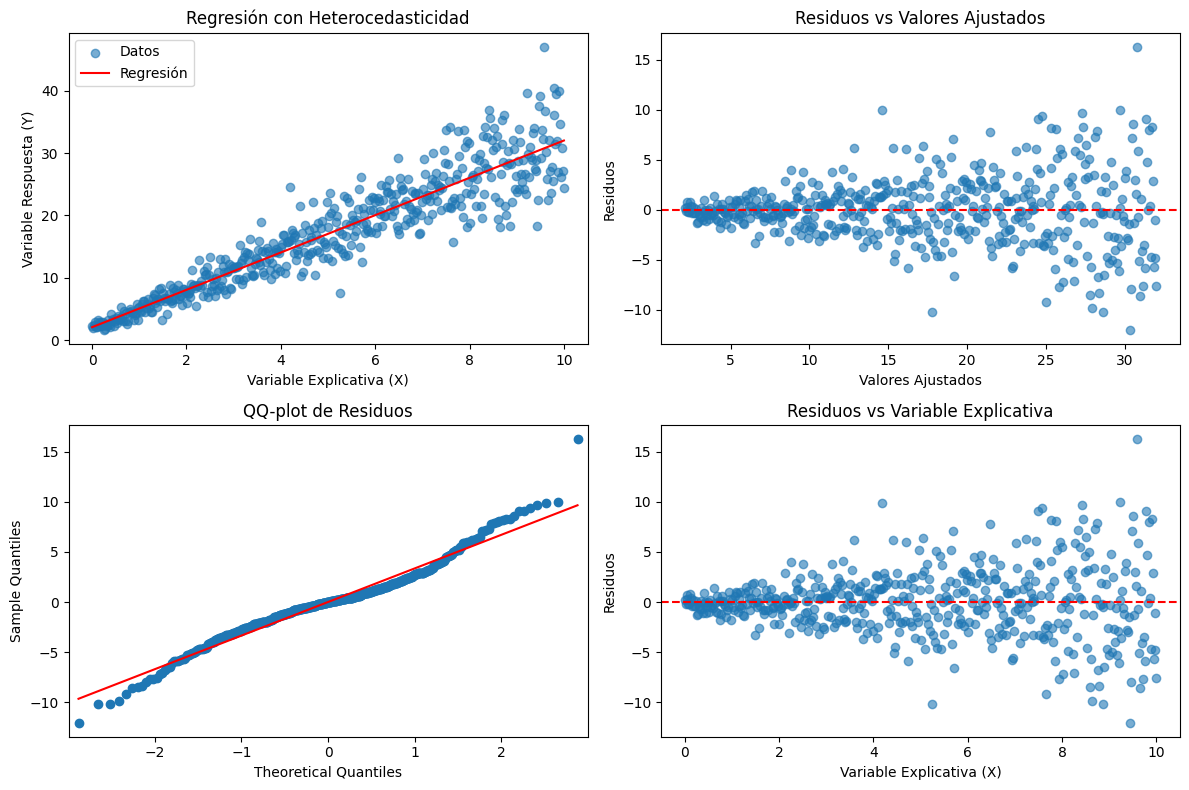

In [52]:

from statsmodels.stats.diagnostic import het_breuschpagan

# Configuración de parámetros
np.random.seed(42)  # Para reproducibilidad
n = 500  # Número de observaciones

# Generar variable explicativa (uniforme entre 0 y 10)
x = np.linspace(0, 10, n)

# Generar heterocedasticidad: la varianza aumenta con x
error_hetero = np.random.normal(0, 0.5 + 0.5*x, n)

# Relación verdadera (y = 2 + 3x + error heterocedástico)
y = 2 + 3*x + error_hetero

# Ajustar modelo de regresión lineal
X = sm.add_constant(x)  # Añadir término constante
model = sm.OLS(y, X)
results = model.fit()

# Imprimir resultados
print(results.summary())

# Prueba de Breusch-Pagan para heterocedasticidad
bp_test = het_breuschpagan(results.resid, results.model.exog)
print(f"\nPrueba de Breusch-Pagan:")
print(f"Estadístico: {bp_test[0]:.4f}")
print(f"Valor p: {bp_test[1]:.4f}")

# Gráficos de diagnóstico
plt.figure(figsize=(12, 8))

# Gráfico 1: Datos y línea de regresión
plt.subplot(2, 2, 1)
plt.scatter(x, y, alpha=0.6, label='Datos')
plt.plot(x, results.fittedvalues, 'r-', label='Regresión')
plt.title('Regresión con Heterocedasticidad')
plt.xlabel('Variable Explicativa (X)')
plt.ylabel('Variable Respuesta (Y)')
plt.legend()

# Gráfico 2: Residuos vs valores ajustados
plt.subplot(2, 2, 2)
plt.scatter(results.fittedvalues, results.resid, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')

# Gráfico 3: QQ-plot de residuos
plt.subplot(2, 2, 3)
sm.qqplot(results.resid, line='s', ax=plt.gca())
plt.title('QQ-plot de Residuos')

# Gráfico 4: Residuos vs variable explicativa
plt.subplot(2, 2, 4)
plt.scatter(x, results.resid, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuos vs Variable Explicativa')
plt.xlabel('Variable Explicativa (X)')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()